# Risk Assesment Report

## Executive Summary




## Overall Trading Partner Risk

Overall CBP reported seizures by country. This is not the predicted risk for our product list but rather historical CBP reported data.

In [2]:
import pandas as pd

ipr_df = pd.read_csv("data/raw/ipr-seizures-fy19-fy23_0.csv")
ipr_df.head()

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
0,2022,CN,Other,Consumer Products & Mass Merchandising,Other,202201000001,1,49314.32
1,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,1,45391.07
2,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,2,9753.60
3,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000003,1,30800.00
4,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000004,1,2840.00


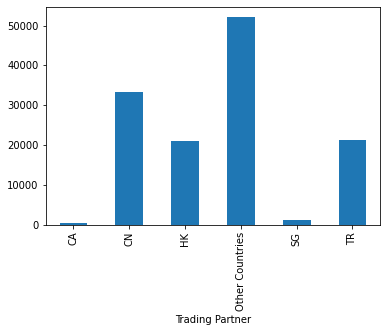

In [11]:
ipr_df[ipr_df.Product == 'Wearing Apparel/Accessories'].groupby('Trading Partner').size().plot(kind='bar');

## High-Value Imports, Inc Product Risk

### Risk Per Trading Partner (over all products)

In [16]:
import pandas as pd

products_df = pd.read_csv("data/processed/hvi_products_risk.csv")
print("Total Records", len(products_df))
products_df.head()

Total Records 4200


,product_id,brand_name,trading_partner,line_count,msrp,seized_pred
0,2296012,Roadster,cn,24,17.909200,1
1,13780156,LOCOMOTIVE,cn,24,13.727599,0
2,11895958,Roadster,cn,24,16.714456,1
3,4335679,Zivame,cn,24,15.471924,1
4,11690882,Roadster,cn,24,7.156511,1


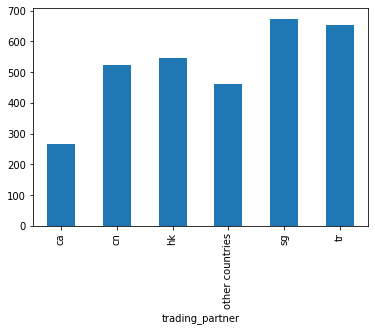

In [17]:
products_df[products_df.seized_pred == 1].groupby('trading_partner').size().plot(kind='bar');

### Risk Per Product (over all trading partners)

#### Top 15 Riskiest Products

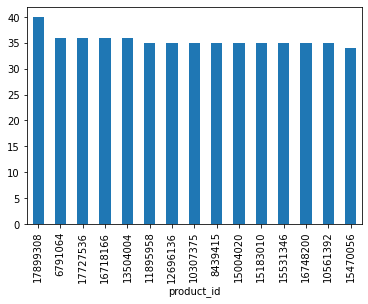

In [27]:
products_df[products_df.seized_pred == 1].groupby("product_id").size().sort_values(
    ascending=False
)[:15].plot(kind="bar");

#### Top 15 Safest Products

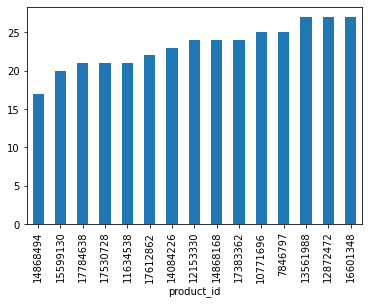

In [28]:
products_df[products_df.seized_pred == 1].groupby("product_id").size().sort_values(
    ascending=True
)[:15].plot(kind="bar");

### Risk Per Trading Partner and Product

#### Top 10 Riskiest Trading Partner and Product

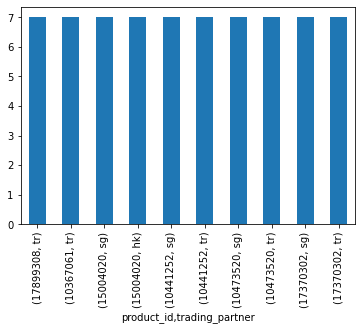

In [35]:
products_df[products_df.seized_pred == 1].groupby(["product_id", "trading_partner"]).size().sort_values(
    ascending=False
)[:10].plot(kind='bar');

#### Top 10 Safest Trading Partner and Product

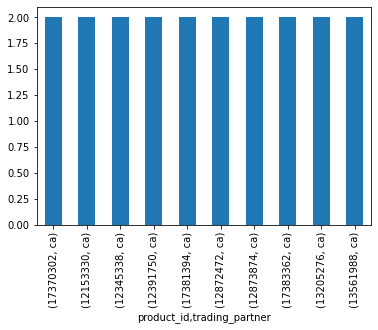

In [33]:
products_df[products_df.seized_pred == 1].groupby(["product_id", "trading_partner"]).size().sort_values(
    ascending=True
)[:10].plot(kind='bar');